In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
print('Librairies importées')

Importation des librairies...


Using TensorFlow backend.


Librairies importées


In [4]:

start = pd.to_datetime('2014-01-28')
end = pd.to_datetime('2019-05-23')

df = web.DataReader('BIDU','yahoo',start,end)

delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')


#dataframe = dataframe.iloc[:,1:]
df.reset_index(inplace=True)
df.head()

Période d'étude :  1340
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1072  jours 
Bloc 2 : 268  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500,164.240005
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800,158.100006
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800,160.809998
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800,156.500000
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500,150.520004


In [5]:
df.shape

(1340, 7)

In [6]:
data_train = df.iloc[:bloc1,:6]
data_train.head()

,Date,High,Low,Open,Close,Volume
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500


In [7]:
df.shape

(1340, 7)

In [8]:
trainset = data_train.iloc[:, 3:4].values
trainset

array([[163.28999329],
       [163.28999329],
       [161.47999573],
       ...,
       [232.83000183],
       [253.94999695],
       [253.69000244]])

In [9]:
sc = MinMaxScaler(feature_range = (0,1))
trainData_scaled = sc.fit_transform(trainset)

In [10]:
x_train = []
y_train = []

In [11]:
for i in range(60, len(data_train)): #60 is the memory size, nb of rows of training data
    x_train.append(trainData_scaled[i-60:i, 0]) # adds data for the last 60 rows
    y_train.append(trainData_scaled[i,0]) # adds the prices that the model is trying to predict

# Convert to tensors
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape

(1012, 60)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adds a 3rd dimension to the tensor
#                     array , new size -->(x, y, z)

In [14]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

W0523 16:32:30.554975 4491625920 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0523 16:32:30.568539 4491625920 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0523 16:32:30.570757 4491625920 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0523 16:32:30.819749 4491625920 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorfl

In [15]:
model.fit(x_train, y_train, epochs = 100, batch_size = 28)

W0523 16:32:31.489349 4491625920 deprecation.py:323] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0523 16:32:33.105453 4491625920 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1012/1012 [==============================] - 6s 6ms/step - loss: 0.0442
Epoch 2/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0114
Epoch 3/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0082
Epoch 4/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 5/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0077
Epoch 6/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0070
Epoch 7/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0062
Epoch 8/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0058
Epoch 9/100
1012/1012 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 10/100
1012/1012 [==============================] - 5s 5ms/step - loss: 0.0056
Epoch 11/100
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0056
Epoch 12/100
1012/1012 [==============================] - 4s 4ms/step - lo

In [16]:
model.save("BIDU_RNN.hd5f")

In [93]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500,164.240005
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800,158.100006
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800,160.809998
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800,156.500000
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500,150.520004


In [94]:
bloc1

1072

In [95]:
data_test= df.iloc[bloc1:,:6] # Import Test Data

In [96]:
data_train.tail()

,Date,High,Low,Open,Close,Volume
1067,2018-04-24,238.360001,228.500000,233.820007,231.410004,2220100
1068,2018-04-25,231.460007,222.500000,229.199997,231.410004,2256400
1069,2018-04-26,239.399994,232.600006,232.830002,238.690002,3899600
1070,2018-04-27,257.299988,245.630005,253.949997,251.929993,8015600
1071,2018-04-30,255.000000,244.399994,253.690002,250.899994,4269500


In [97]:
data_test.head()

,Date,High,Low,Open,Close,Volume
1072,2018-05-01,254.080002,246.009995,247.240005,252.130005,2471100
1073,2018-05-02,252.740005,246.800003,250.919998,249.800003,3058000
1074,2018-05-03,254.539993,245.740005,249.000000,252.460007,2728200
1075,2018-05-04,254.740005,249.289993,250.850006,251.729996,2697100
1076,2018-05-07,257.000000,250.250000,251.529999,253.899994,3049400


In [98]:
actual_stock_price = data_test.iloc[:, 3:4].values # Get the Open Prices

In [99]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis=0) 
# combines the train and test data (axis=0 labels by index)

In [100]:
data_total[-5:]

1335    130.529999
1336    123.230003
1337    119.220001
1338    120.800003
1339    120.800003
Name: Open, dtype: float64

In [106]:
inputs = data_total[len(data_total) - len(data_test)-60:].values #removes the answers
print(len(data_total))
print(len(data_test))

inputs = inputs.reshape(-1, 1) #Converts the row of values into a column vector
inputs = sc.transform(inputs) # Feature Scaling (0-1)
inputs.shape

1340
268


(328, 1)

In [107]:
import talib
ema3 = talib.EMA(df['Close'],3)

In [103]:
ema3.head()

0           NaN
1           NaN
2    161.050003
3    158.775002
4    154.647503
dtype: float64

In [104]:
inputs = sc.transform(ema3.iloc[-268].reshape(-1,1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Add a 3rd dimension

IndexError: tuple index out of range

In [108]:
# Prepare Testing Inputs
x_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0]) #Prepares the 60 data memory input

x_test = np.array(x_test) #Turn the inputs into an array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Add a 3rd dimension

In [109]:
# Use the RNN to make the predeictions 
raw_prediction = model.predict(x_test)

In [110]:
price_prediction = sc.inverse_transform(raw_prediction) # Undoes the normalization into usable values
price_prediction [0:5]

array([[251.35222],
       [244.3035 ],
       [246.51668],
       [245.87242],
       [247.66277]], dtype=float32)

In [111]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion_long = []
percentChange_long = []
Suggestion_short = []
percentChange_short = []

for d in range(1,len(raw_prediction)):
    percentChange_long.append(float((raw_prediction[d]-raw_prediction[d-1])))
    percentChange_short.append(float((raw_prediction[d]-raw_prediction[d-1])))

for n in percentChange_long:
    #print(n)
    if n > 0.02:
        Suggestion_long.append(-1) # Sell after a threshhold of increase
    elif n < 0.02:
        Suggestion_long.append(1) # Buy when there is a drop
    else:
        Suggestion_long.append(0)
#print(Buy)

    
for n in percentChange_short:
    #print(n)
    if n < -0.02:
        Suggestion_short.append(1) # Buy after a threshhold of increase
    elif n > 0.02:
        Suggestion_short.append(-1) # Sell when there is a drop
    else:
        Suggestion_short.append(0)
#print(Buy)

In [112]:
PurchaseHistory_long=[]
BuyPoints_long =  [[], []]
SellPoints_long = [[], []]
bought_long = False
PurchaseHistory_short=[]
BuyPoints_short =  [[], []]
SellPoints_short = [[], []]
sold_short = False

for i in range(0, len(actual_stock_price)-1):
    if Suggestion_long[i] == 1 and not bought_long:
        PurchaseHistory_long.append(["Buy: ", actual_stock_price[i], i])
        BuyPoints_long[0].append(actual_stock_price[i])
        BuyPoints_long[1].append(i)
        bought_long = True
    
    if Suggestion_long[i] == -1 and bought_long:
        PurchaseHistory_long.append(["Sell:", actual_stock_price[i], i])
        SellPoints_long[0].append(actual_stock_price[i])
        SellPoints_long[1].append(i)        
        bought_long = False
    
    if Suggestion_short[i] == -1 and not sold_short:
        PurchaseHistory_short.append(["Sell: ", actual_stock_price[i], i])
        SellPoints_short[0].append(actual_stock_price[i])
        SellPoints_short[1].append(i)
        sold_short = True
    
    if Suggestion_short[i] == 1 and sold_short:
        PurchaseHistory_short.append(["Buy:", actual_stock_price[i], i])
        BuyPoints_short[0].append(actual_stock_price[i])
        BuyPoints_short[1].append(i)        
        sold_short = False
        
if len(PurchaseHistory_long)%2 != 0:
    PurchaseHistory_long.pop()
    BuyPoints_long[0].pop()
    BuyPoints_long[1].pop() 


if len(PurchaseHistory_short)%2 != 0:
    PurchaseHistory_short.pop()
    SellPoints_short[0].pop()
    SellPoints_short[1].pop() 


In [113]:
purchase = 0
Profit_long = 0
for purchase in range(1, len(PurchaseHistory_long)+1, 2):
    MoneyMade_long = float(PurchaseHistory_long[purchase][1] - float(PurchaseHistory_long[purchase-1][1]))
    Profit_long += MoneyMade_long

print('Profit Long : $'+ str(round(Profit_long, 2)))

Profit Long : $-1.26


In [114]:
Profit_short = 0
for purchase in range(1, len(PurchaseHistory_short)+1, 2):
    MoneyMade_short = (float(-PurchaseHistory_short[purchase][1] + float(PurchaseHistory_short[purchase-1][1])))
    Profit_short += MoneyMade_short

print('Profit Short : $'+ str(round(Profit_short, 2)))

Profit Short : $115.76


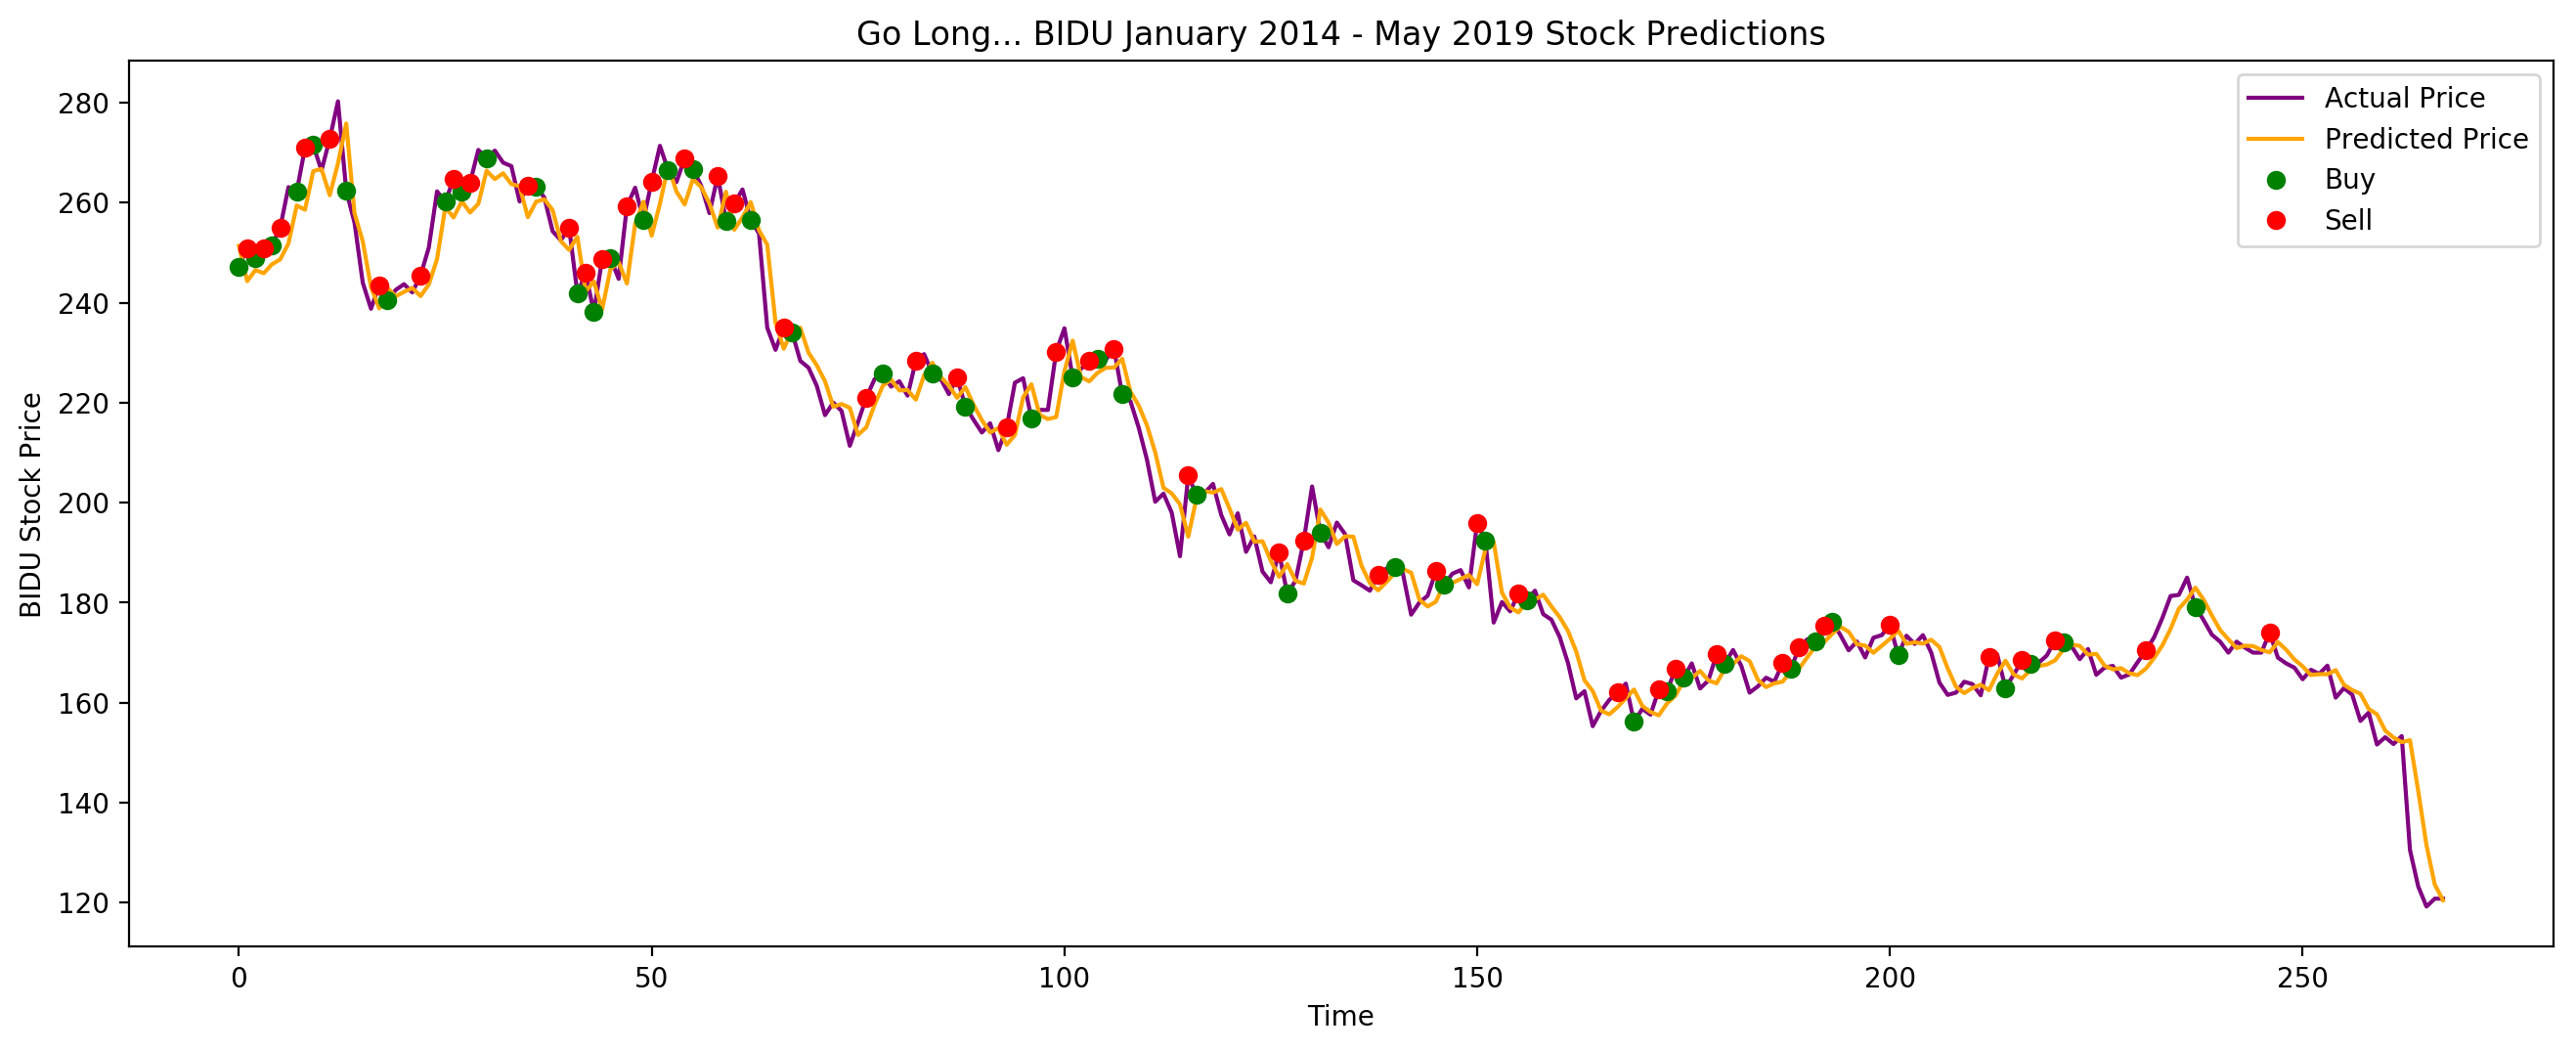

In [117]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_long[1], BuyPoints_long[0], "go",label='Buy')
plt.plot(SellPoints_long[1], SellPoints_long[0], "ro",label='Sell')
plt.title("Go Long... BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()

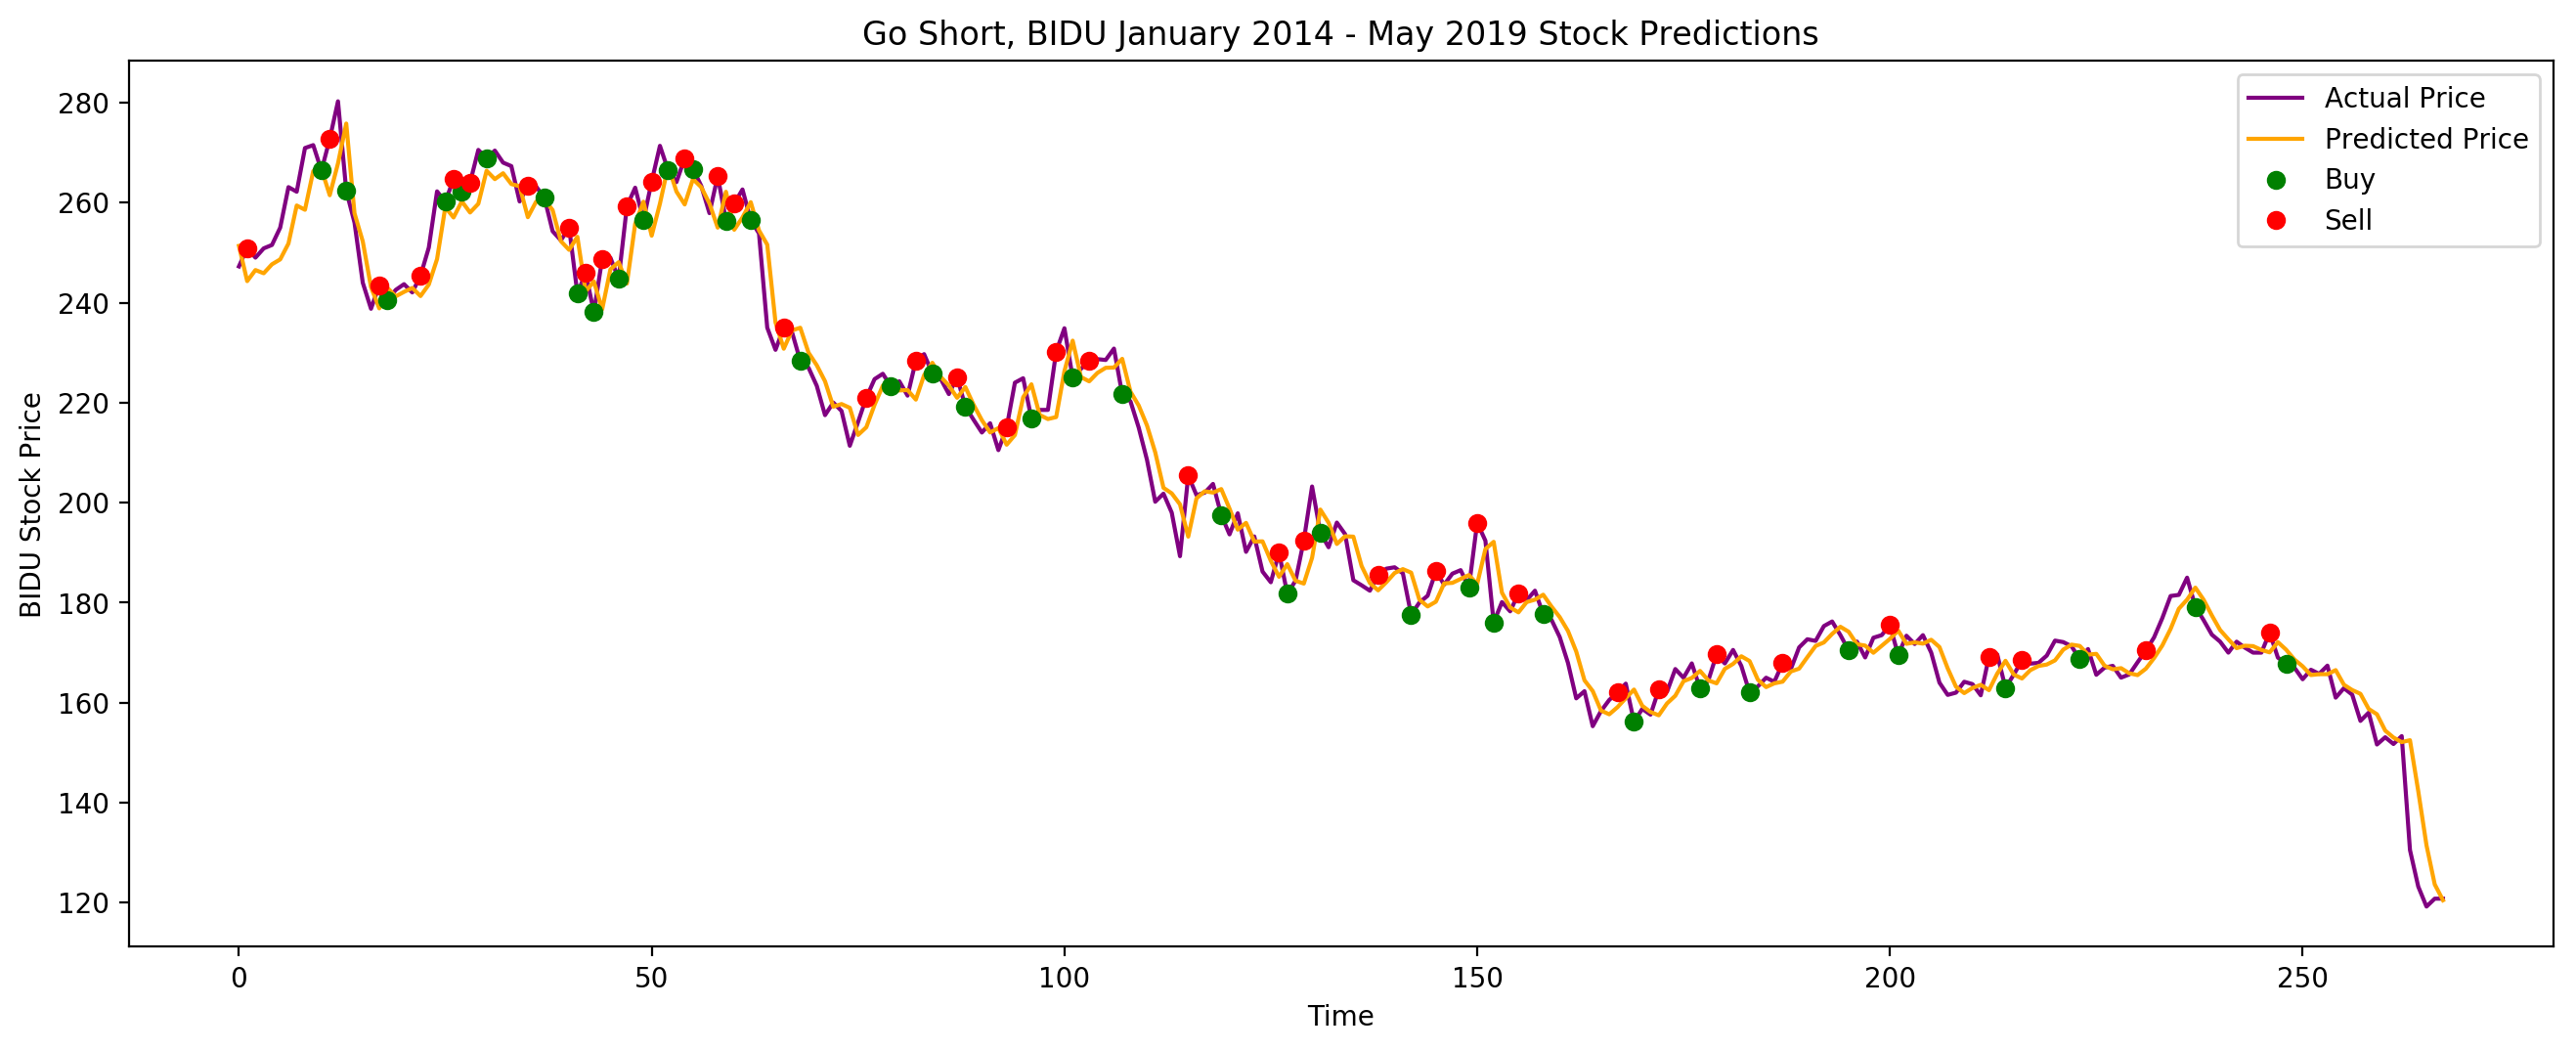

In [89]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_short[1], BuyPoints_short[0], "go",label='Buy')
plt.plot(SellPoints_short[1], SellPoints_short[0], "ro",label='Sell')

plt.title("Go Short, BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()

In [90]:
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))

Cumulative Profit : $114.5


In [91]:
MinimumRequiredCapital_long = max(BuyPoints_long[0])
MinimumRequiredCapital_short = max(BuyPoints_short[0])
ROI_long = Profit_long / MinimumRequiredCapital_long * 100
ROI_short = Profit_short / MinimumRequiredCapital_short * 100
print('Summary BIDU')
print('Total period : From ',start,' to ',end)
print('Training on ',bloc1,' days')
print('Testing on ',bloc2,' days')
print('Minimum Required Capital long :',round(MinimumRequiredCapital_long[0]),'$')
print('Minimum Required Capital short :',round(MinimumRequiredCapital_short[0]),'$')
print('Number of long :',len(BuyPoints_long[1]))
print('Number of short :',len(BuyPoints_short[1]))
print('Short CumProfit :''$'+ str(round(Profit_short, 2)))
print('Long CumProfit :''$'+ str(round(Profit_long, 2)))
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))
print("Return on Long Investment:", round(float(ROI_long), 2),"%")
print("Return on Short Investment:", round(float(ROI_short), 2),"%")

Summary BIDU
Total period : From  2014-01-28 00:00:00  to  2019-05-23 00:00:00
Training on  1072  days
Testing on  268  days
Minimum Required Capital long : 272.0 $
Minimum Required Capital short : 269.0 $
Number of long : 46
Number of short : 38
Short CumProfit :$115.76
Long CumProfit :$-1.26
Cumulative Profit : $114.5
Return on Long Investment: -0.46 %
Return on Short Investment: 43.06 %


In [37]:
df.shape

(1340, 7)

In [132]:
Zema3 = ema3.iloc[-268:]
Zema3 = Zema3.reset_index()
Zema3 = Zema3.iloc[:,1:]
Zema3.head()

,0
0,249.685294
1,249.742649
2,251.101328
3,251.415662
4,252.657828


In [133]:
len(actual_stock_price),len(price_prediction),len(Zema3)

(268, 268, 268)

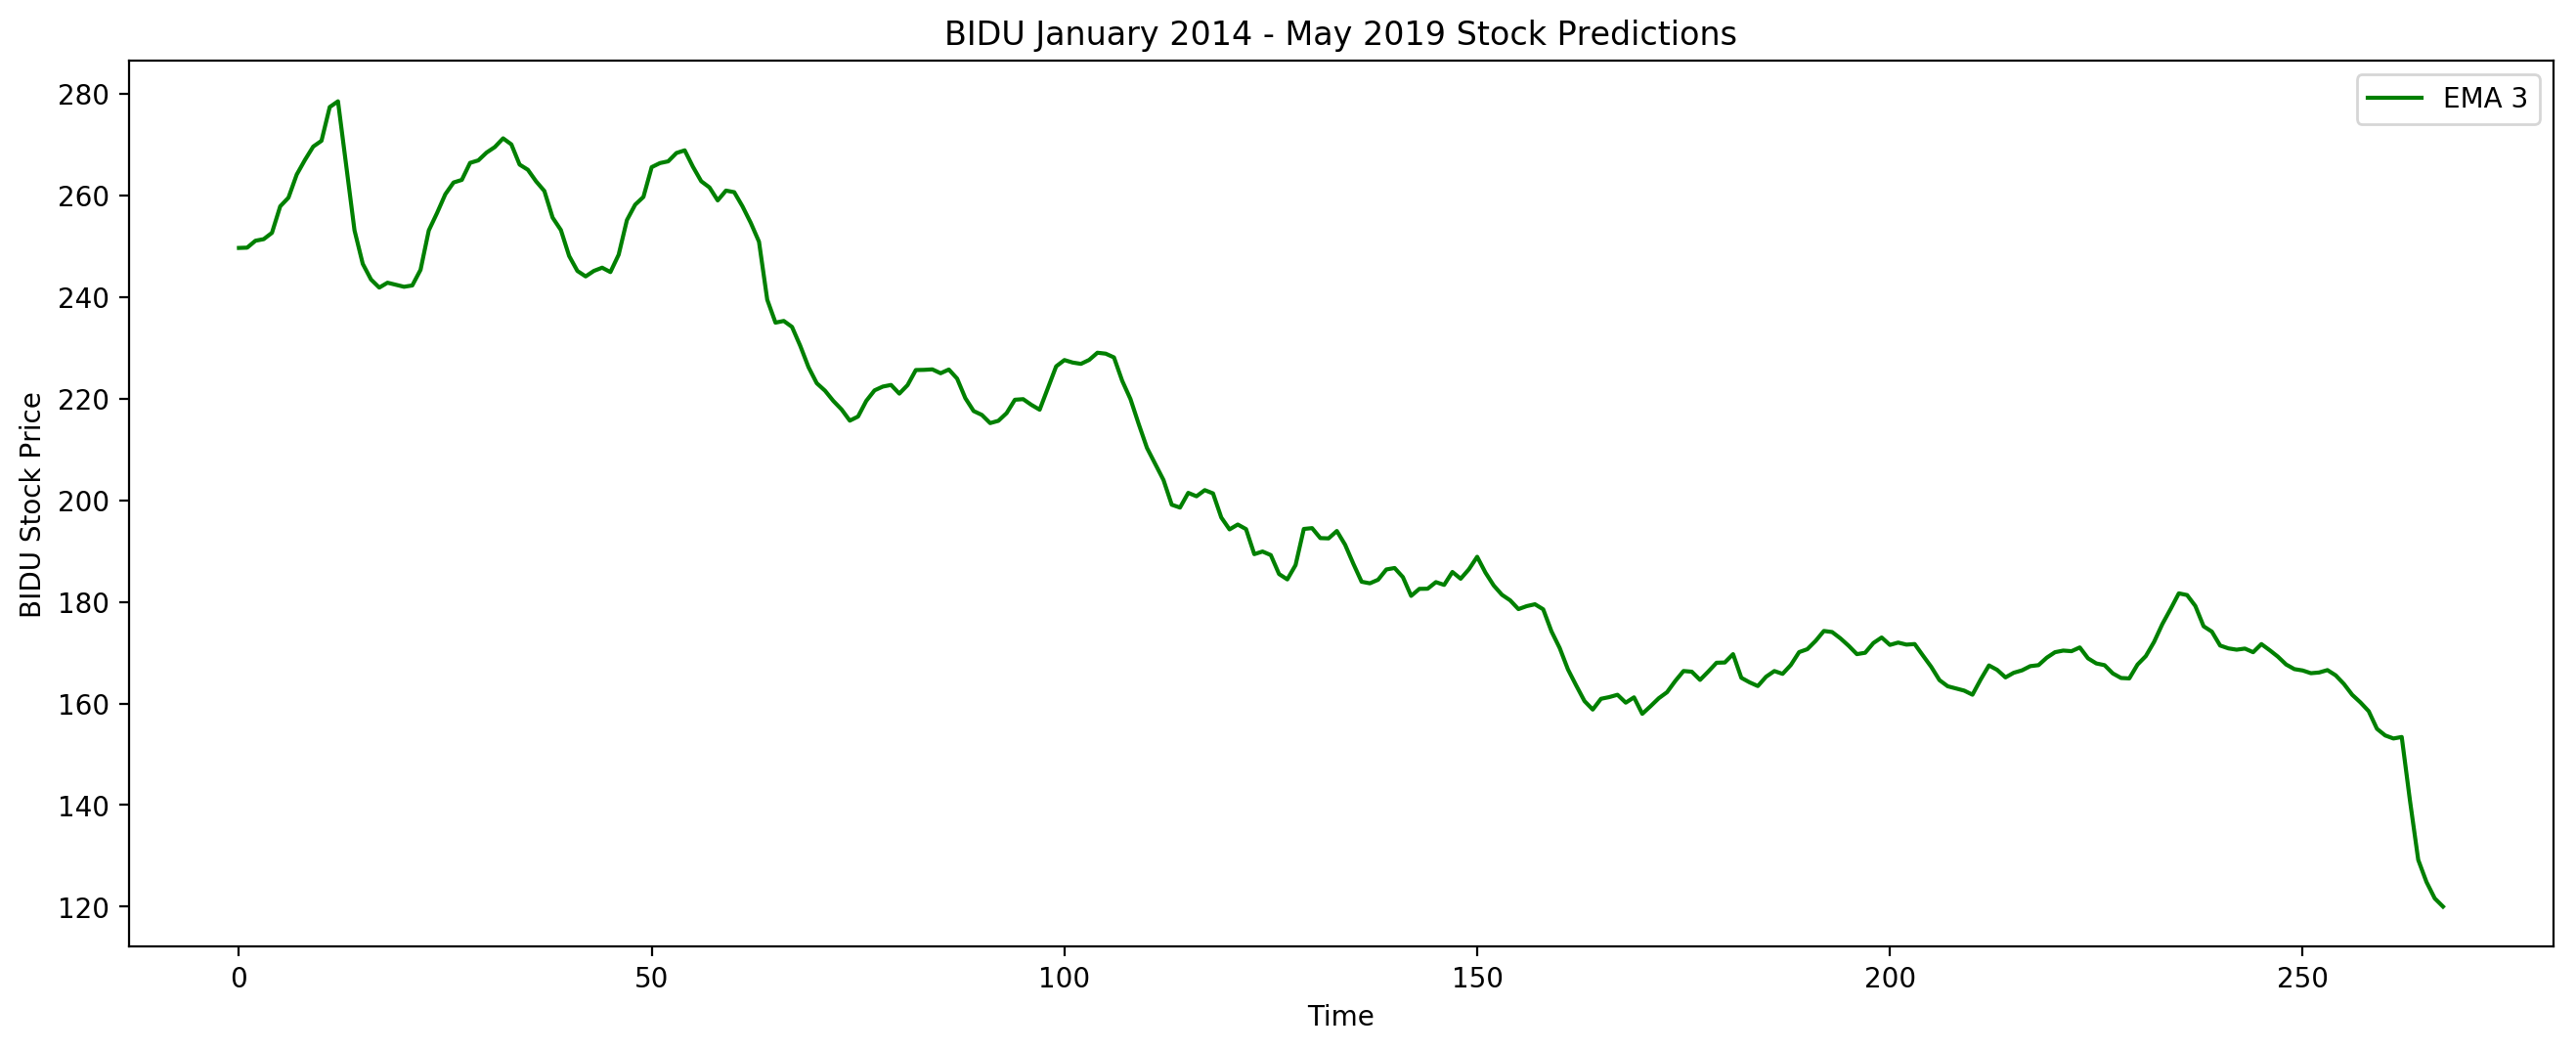

In [134]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(Zema3, color = 'green', label = "EMA 3")
plt.title("BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()

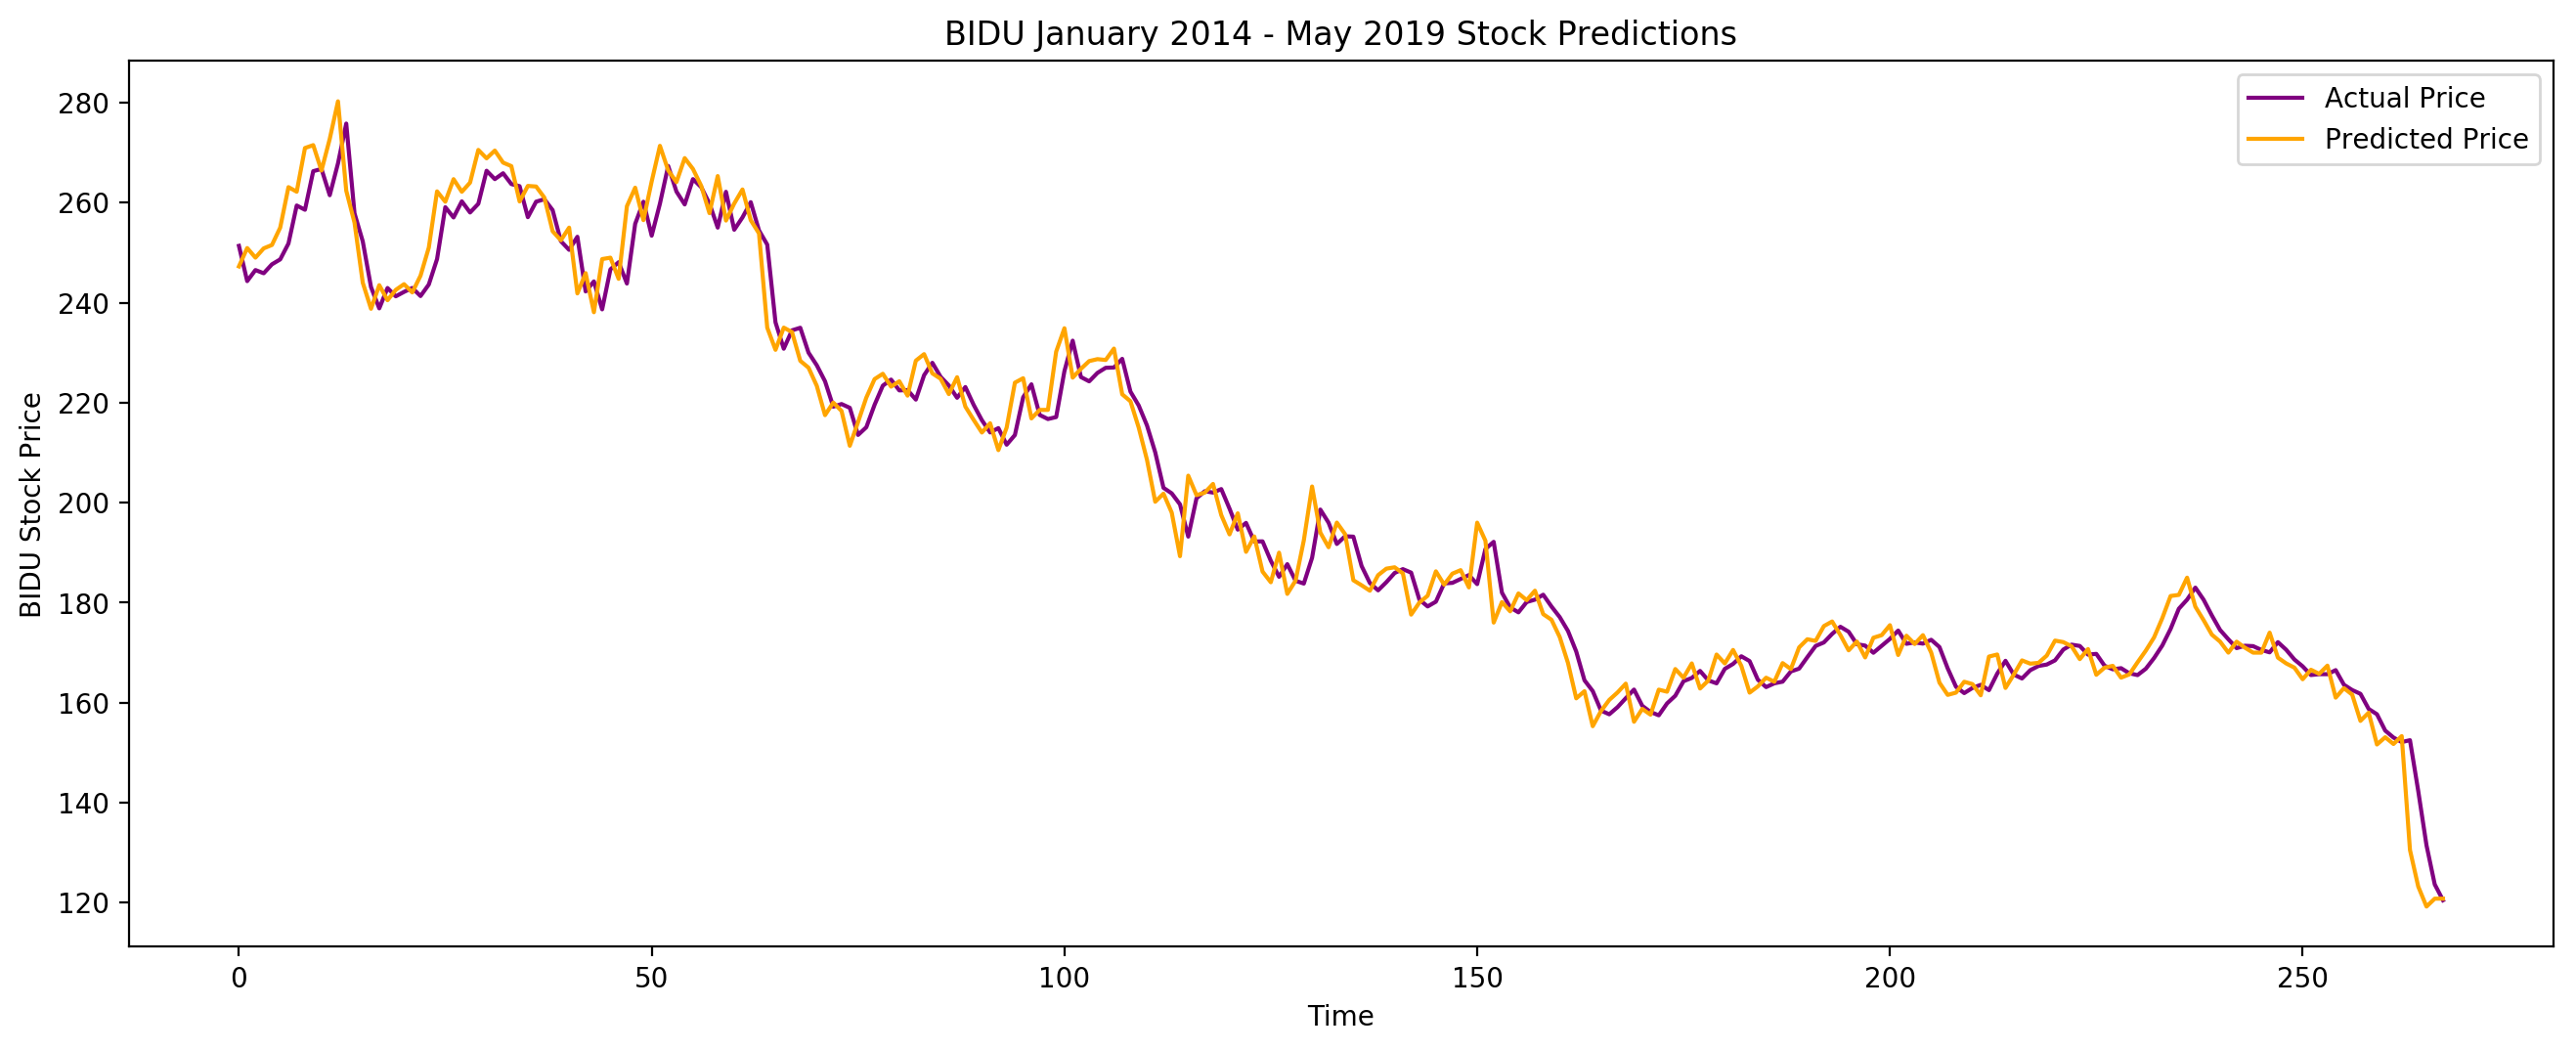

In [139]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(price_prediction, color =  'purple', label = "Actual Price")
plt.plot(actual_stock_price, color = 'orange', label = "Predicted Price")
#plt.plot(Zema3, color = 'green', label = "EMA 3")
plt.title("BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()